In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 182s 766ms/step - loss: 0.2324 - val_loss: 0.0802
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 171s 728ms/step - loss: 0.0787 - val_loss: 0.0736


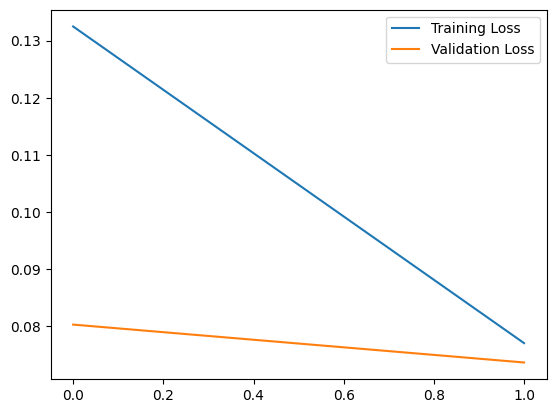

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


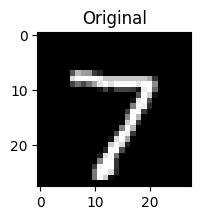

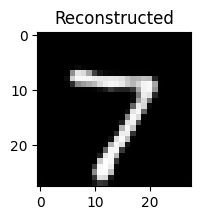

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
with np.load('/content/mnist.npz') as data:
    x_train=data['x_train']
    x_test=data['x_test']
    y_test=data['y_test']

'''
import tensorflow as tf

# Paths
train_dir = "dataset/train"
test_dir = "dataset/test"

# Load images
img_height, img_width = 28, 28  # same as MNIST
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels=None,                  # No labels needed
    image_size=(img_height, img_width),
    color_mode='grayscale',       # for single channel
    batch_size=batch_size,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels=None,
    image_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    shuffle=False
)
'''

# Normalize the images to the range [0, 1]
x_train = x_train/ 255.0
x_test = x_test / 255.0

# Add a channel dimension (for grayscale images, it's 1 channel)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the convolutional autoencoder model
def create_autoencoder():
    # Encoder
    input_img = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = create_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=2,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Encode and decode some test images
decoded_imgs = autoencoder.predict(x_test)

# Choose one test image to visualize
i = 0
# Original image
plt.figure(figsize=(4, 2))
plt.title("Original")
plt.imshow(x_test[i], cmap='gray')


# Reconstructed image
plt.figure(figsize=(4, 2))
plt.title("Reconstructed")
plt.imshow(decoded_imgs[i], cmap='gray')
plt.show()